<a href="https://colab.research.google.com/github/Thierno-dev/MachineLearningApprentissage/blob/main/RegressionLineaireSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercice de regression lineaire en predisant le salire de quelqun

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


REcuperation des données

In [57]:
data = pd.read_csv("Salary.csv")

#Recuperer les infos de la données charge

data.info()# Recupere les données et verifi s'il n'ya pas de valeur null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


Preparation des données en divisant les données selon les categoriees cible et features

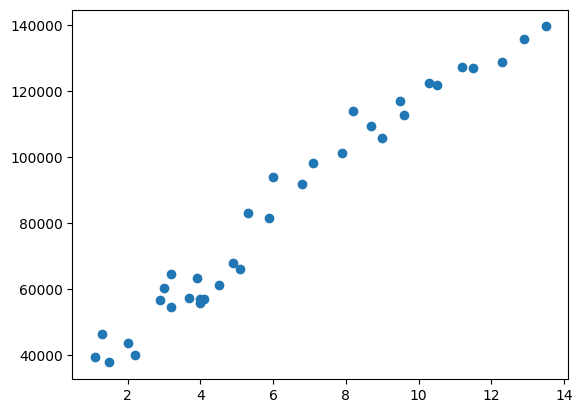

In [58]:
X = data[['YearsExperience']]

y = data['Salary']


plt.scatter(X,y)#visualisation de l'experience et de la disparite

# Separation des dataset en entrainement et test avec l'appel de la bibliotheque sklearn

In [59]:
#Separer les données en train et test

from sklearn.model_selection import train_test_split#importation de la bibliotheque de test


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

X_test,y_test

(    YearsExperience
 29             10.5
 20              6.8
 16              5.1
 28             10.3
 22              7.9
 15              4.9
 10              3.9
 2               1.5
 11              4.0
 27              9.6
 25              9.0
 34             13.5,
 29    121872
 20     91738
 16     66029
 28    122391
 22    101302
 15     67938
 10     63218
 2      37731
 11     55794
 27    112635
 25    105582
 34    139465
 Name: Salary, dtype: int64)

# Importation du modele de regression lineaire dans sklearn

In [60]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()#creation de l'instance




# Faire l'entrainement du modele

In [61]:
regression.fit(X_train,y_train) #entrainer le modele avec les données d'entrainement X et y

LinearRegression()

Trouver les coeficient a et b de la fonction ax + b

In [62]:
print(regression.coef_)# coefficient a apres entrainement

print(regression.intercept_)#coefficient b apres entrainement

[8692.01316868]
29974.33208826927


Dessiner la droite dans le graphique de depart

Text(0, 0.5, 'Salaire')

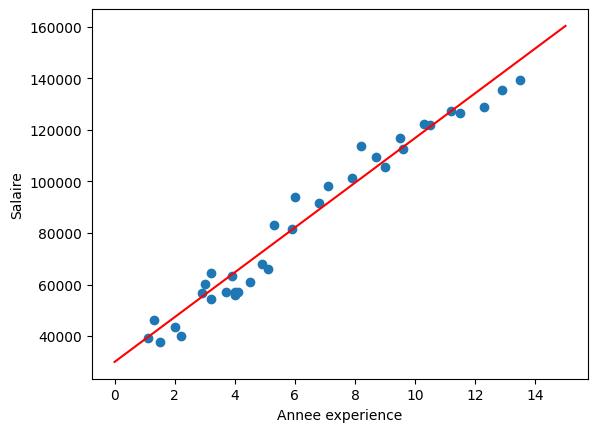

In [63]:
# Ajouter la droite dans le graphique

abscisse = np.linspace(0,15,1000)

plt.scatter(X,y)

plt.plot(abscisse,regression.coef_*abscisse+regression.intercept_,color='r')

plt.xlabel("Annee experience")

plt.ylabel("Salaire")

# Evaluation du modele

In [64]:
#Creation de la valeur de prediction

y_predict = regression.predict(X_test)

In [65]:
from sklearn import metrics

print("MAE:",metrics.mean_absolute_error(y_test,y_predict))

print("MSE:",metrics.mean_squared_error(y_test,y_predict))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

print("R²:",metrics.r2_score(y_test,y_predict))



MAE: 3990.0449210006386
MSE: 24190855.78256977
RMSE: 4918.420049423368
R²: 0.9737903397670056


# Creation de nouvelle donnees en predisant le salaire , en fonctionn des annees d'experience

In [73]:
New_data = [1,4]



New_Test = pd.DataFrame(New_data,columns=['YearsExperience'])

y_new = regression.predict(New_Test)

y_new

array([38666.34525695, 64742.384763  ])